## https://www.linkedin.com/in/amitfallach/

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

##### The file dailykos contains data on 3,430 news articles or blogs published in Kos Daily.
##### These articles were published in 2004 and led to the United States presidential election. The leading candidates were the president Incumbent George W. Bush (Republican) and John Kerry (Democrat). Foreign policy was a dominant issue in the elections, and especially.The invasion of Iraq in 2003 Each of the variables in the data set is a word that appeared in at least 50 different articles (1,545 words in total). The array of words is trimmed according to some of the existing techniques in text analysis (punctuation removed and stop words removed). For each document, the variable values are the number of times the word appeared in the document.

##### We will use different clustering methods to learn about the algorithms and how they work and try to draw conclusions

In [33]:
data= pd.read_csv('dailykos.csv')
data.head()

,Document,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


## K-means

##### function that implements the K means algorithm in different divisions and shows a comparison of the quality of the division according to SSE & silhouette score in addition to the graph of the elbow method.

##### We will emphasize that because it is known that the values in the data frame are natural numbers and about the same norm (they all represent the amount of words in the article) we will not need scaling.

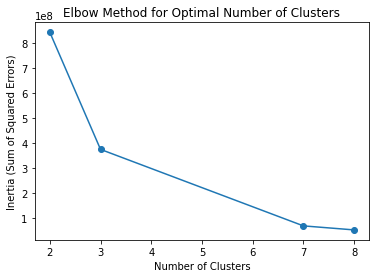

,Clusters,SSE,Silhouette,Sample Count,Min Count,Max Count
0,2,8.415947e+08,0.625761,0 1716 1 1714 dtype: int64,1714,1716
1,3,3.745378e+08,0.588230,1 1145 2 1143 0 1142 dtype: int64,1142,1145
2,7,6.951579e+07,0.540412,3 492 4 492 0 490 1 490 6 489 2...,488,492
3,8,5.343367e+07,0.534682,0 433 7 432 4 430 2 429 5 428 1...,425,433


In [14]:
def cluster_and_evaluate(data, cluster_range=[2, 3, 7, 8]):
    
    results_df = pd.DataFrame(columns=['Clusters', 'SSE', 'Silhouette', 'Sample Count', 'Min Count', 'Max Count'])
    elbow_df = pd.DataFrame(columns=['Clusters', 'Inertia'])

    for num_clusters in cluster_range:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
        kmeans.fit(data)
        labels = kmeans.labels_
        sample_count = pd.Series(labels).value_counts()

        # Calculate SSE (Sum of Squared Errors)
        sse = kmeans.inertia_
        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, labels)
        
        results_df = pd.concat([results_df, pd.DataFrame({'Clusters': [num_clusters], 'SSE': [sse], 'Silhouette': [silhouette_avg], 'Sample Count': [sample_count], 'Min Count': [sample_count.min()], 'Max Count': [sample_count.max()]})], ignore_index=True)
        elbow_df = pd.concat([elbow_df, pd.DataFrame({'Clusters': [num_clusters], 'Inertia': [sse]})], ignore_index=True)

    # Plotting the Elbow Method
    plt.plot(elbow_df['Clusters'], elbow_df['Inertia'], marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Sum of Squared Errors)')
    plt.show()

    return results_df

results = cluster_and_evaluate(data)
results

#### <blockquote>According to the silhouette and the SSE, the decision will be between 2 clusters and 3 clusters</blockquote>

##### Both the silhouette score and the sum of squared errors (SSE) provide important insights into the quality of a cluster model, but they measure different aspects of cluster performance.

##### When evaluating clustering models, the Silhouette Score serves as a valuable metric if the primary objective is to assess the separation and distinctiveness of clusters. Higher Silhouette Scores indicate well-defined and separated clusters. On the other hand, if the focus is on determining the optimal number of clusters and assessing their compactness, the Sum of Squared Errors (SSE) becomes a useful metric. Particularly when employed in conjunction with the elbow method, SSE helps in identifying a suitable number of clusters by measuring the compactness of the clusters.

#### We will check what the silhouette of each of the clusters looks like

Silhouette score for 2 clusters: 0.6257610722937336
Silhouette score for 3 clusters: 0.5882297332494477
Silhouette score for 4 clusters: 0.5687321892440083
Silhouette score for 5 clusters: 0.5563379557867503
Silhouette score for 6 clusters: 0.547472589882861
Silhouette score for 7 clusters: 0.5404715509751489
Silhouette score for 8 clusters: 0.5346797641237238
Silhouette score for 9 clusters: 0.5296326935052298
Silhouette score for 10 clusters: 0.5250025823715573


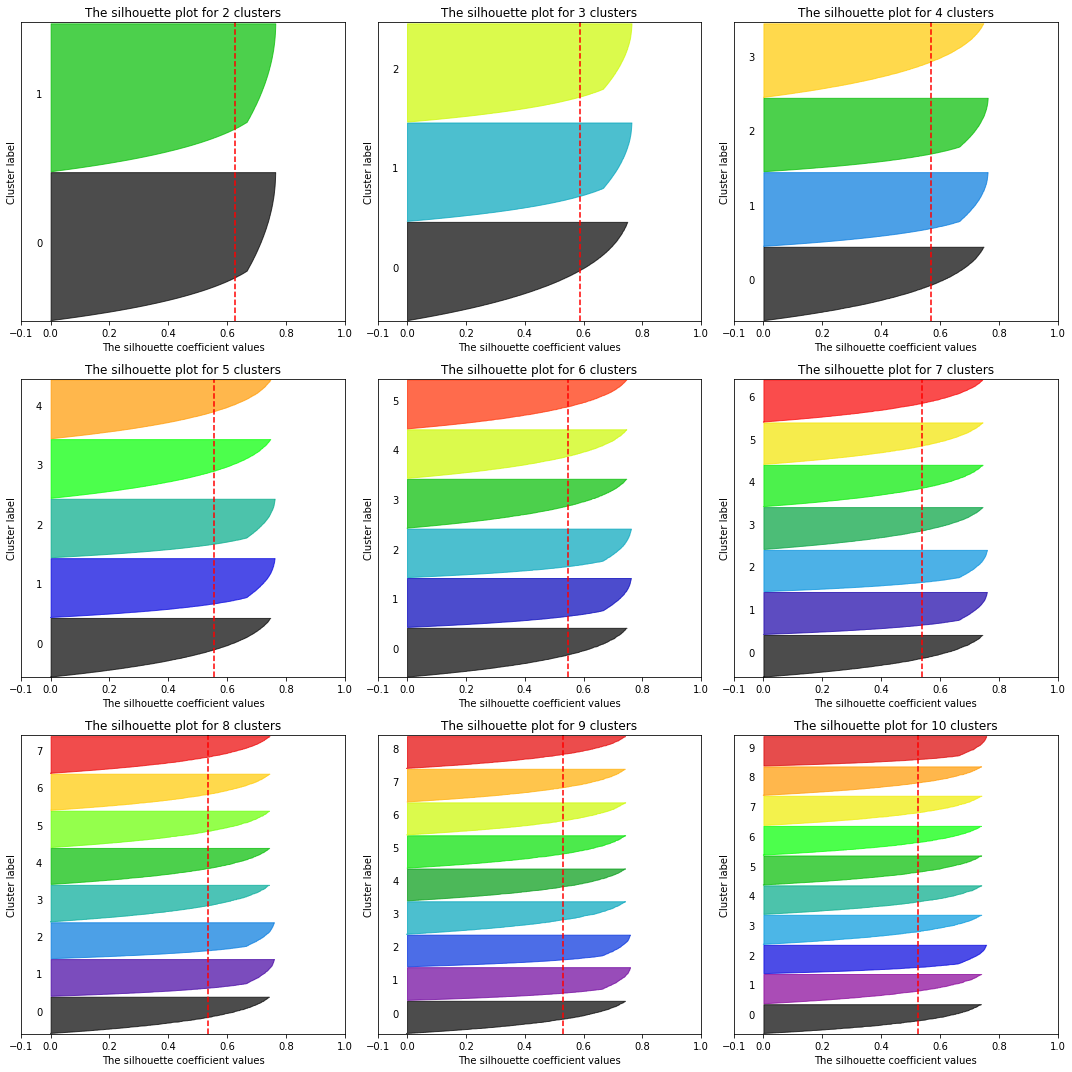

In [32]:
def plot_silhouette(data, n_clusters, ax):
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(data)
    cluster_labels = clusterer.labels_

    silhouette_avg = silhouette_score(data, cluster_labels)

    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    cluster_samples = {}

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

        cluster_samples[i] = size_cluster_i
    ax.set_title(f"The silhouette plot for {n_clusters} clusters")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    return clusterer.inertia_, silhouette_avg, cluster_samples


fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

range_n_clusters = range(2, 11)

for i, n_clusters in enumerate(range_n_clusters):
    sse, silhouette_avg, cluster_samples = plot_silhouette(data, n_clusters, axs[i])
    print(f"Silhouette score for {n_clusters} clusters: {silhouette_avg}")

plt.tight_layout()
plt.show()

#### <blockquote> My decision is to split the Data into 3 clusters. </blockquote>

##### It can be seen that his SSE score is the lowest (through the graph of the elbow method) and in addition the Silhouette is relatively high.

##### After researching the topic, I did not choose the division into 2 clusters (even though the silhouette of the division into 2 is the highest) because in my opinion, the division into 2 clusters is too weak to classify articles with thousands of words.

In [25]:
def export_clusters_to_csv(data, output_path='cluster_', num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)

    # Add cluster labels to the original data
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = kmeans.labels_

    # Export separate CSV files for each cluster
    for cluster_label in range(num_clusters):
        cluster_data = data_with_labels[data_with_labels['Cluster'] == cluster_label]
        output_file_path = f"{output_path}cluster_{cluster_label}.csv"
        cluster_data.to_csv(output_file_path, index=False)
        print(f"Cluster {cluster_label} data exported to {output_file_path}")

export_clusters_to_csv(data)

C:\Users\amitf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0 data exported to cluster_cluster_0.csv
Cluster 1 data exported to cluster_cluster_1.csv
Cluster 2 data exported to cluster_cluster_2.csv


##### To check what topic each cluster refers to and whether the division makes sense, I built a function that exports the top words that repeat the most in each file. Through the most common words we can check if there is a common denominator or topic for all the articles in the file

In [27]:
def top_words(data, num_words=30):
    word_count_columns = data.columns[1:]
    total_word_counts = data[word_count_columns].sum()
    top_words_df = pd.DataFrame(total_word_counts.nlargest(num_words), columns=['Word Count'])
    return top_words_df

In [28]:
df0= pd.read_csv('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\machine learning practice\\clustering\\cluster_cluster_0.csv')
df1= pd.read_csv('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\machine learning practice\\clustering\\cluster_cluster_1.csv')
df2= pd.read_csv('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\machine learning practice\\clustering\\cluster_cluster_2.csv')

list_df = [df0,df1,df2]

for idx, df in enumerate(list_df):
    df_name = f"df{idx}"
    num_rows = df.shape[0]
    print(f"Top words for {df_name} (Rows: {num_rows}):")
    result = top_words(df)
    print(result)
    print("\n" + "="*30 + "\n")

Top words for df0 (Rows: 1142):
            Word Count
bush              2902
poll              1707
democrat          1537
kerry             1526
republican        1327
november          1231
vote              1211
state             1041
elect              999
general            890
war                871
iraq               818
presided           815
campaign           793
time               781
senate             778
voter              771
house              739
nation             640
race               637
parties            596
year               569
candidate          555
challenge          553
report             544
political          492
media              484
people             479
oct                454
american           452


Top words for df1 (Rows: 1145):
            Word Count
bush              2501
kerry             1732
poll              1441
november          1320
democrat          1275
republican        1208
Cluster           1145
vote              1119
elect         

## conclusions



#### Cluster 0: 
<blockquote>This cluster seems to focus on the broader political landscape, the election process, and issues related to the 2004 US elections. The most frequent words include terms like "bush," "poll," "Democrat," "Kerry," "Republican," "vote," "elect," "war," "Iraq," and "campaign." The words suggest a concentration on the candidates, political parties, voting, and the overall electoral environment.</blockquote>

#### Cluster 1: 
<blockquote> This cluster appears to be more specific and may center around the candidates themselves and the dynamics of the election campaign. The most frequent words include "bush," "Kerry," "poll," "November," "Democrat," "Republican," "vote," "elect," "war," "State," "General," "Senate," and "house." The inclusion of terms like "race," "people," and "candidate" suggests a focus on the individuals involved and the campaign activities.</blockquote>

#### Cluster 2: 
<blockquote> When I researched a bit on the Internet, I saw that words like "primaries", "Clark" and "Edwards" can indicate that the cluster is centered around the primaries and the course of the preliminary elections in the Democratic Party.
John Edwards ran against Kerry and eventually supported him in the Democratic Party.
Wesley Clark was a military general from Arkansas. Retired on February 11 and supported Kerry.</blockquote>


#### It seems like Cluster 0 is broader, covering the general political and electoral landscape, while Clusters 1 and 2 are more specific, honing in on the candidates and the dynamics of the election campaign.

## Hierarchical clustering - agglomerative_clustering

##### The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together.

<blockquote> Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.</blockquote>

<blockquote> Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.</blockquote>

<blockquote> Average linkage minimizes the average of the distances between all observations of pairs of clusters.</blockquote>

<blockquote> Single linkage minimizes the distance between the closest observations of pairs of clusters.</blockquote>

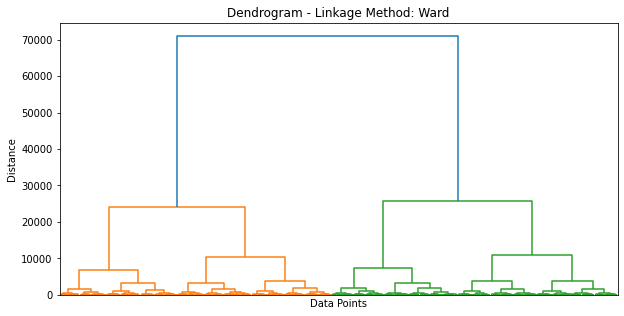

C:\Users\amitf\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster labels using Ward linkage:
[1920 2216 2170 ...    5    2    0]



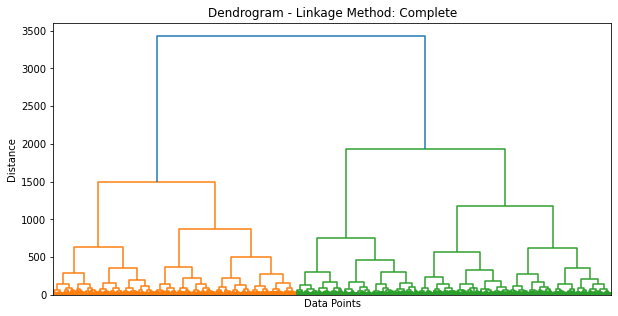

C:\Users\amitf\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster labels using Complete linkage:
[3133 2246 2112 ...    2    1    0]



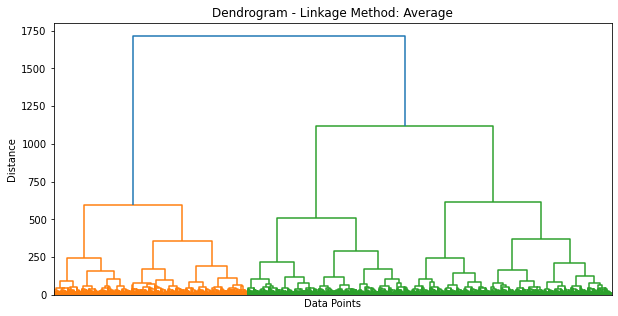

C:\Users\amitf\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster labels using Average linkage:
[3409 2013 1901 ...    2    1    0]



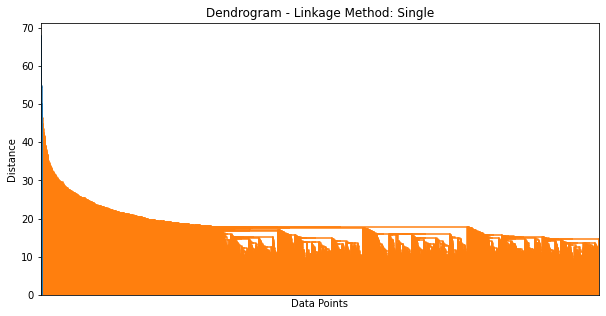

C:\Users\amitf\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster labels using Single linkage:
[3093 1866 2509 ...    4    1    0]



In [8]:
def compare_agglomerative_clustering(data_frame):
    data_array = data_frame.values
    linkage_methods = ['ward', 'complete', 'average', 'single']

    for method in linkage_methods:
        Z = linkage(data_array, method)

        plt.figure(figsize=(10, 5))
        dendrogram(Z, labels=data_frame.index, orientation='top', leaf_rotation=90, leaf_font_size=8)
        plt.title(f'Dendrogram - Linkage Method: {method.capitalize()}')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Hide x-axis tick labels
        plt.show()
        
        cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage=method, distance_threshold=0)
        cluster_labels = cluster.fit_predict(data_array)

        print(f'Cluster labels using {method.capitalize()} linkage:\n{cluster_labels}\n{"="*40}\n')

compare_agglomerative_clustering(data)


## conclusions


<blockquote> single - The algorithm is sensitive to small differences between data points, leading to the formation of numerous clusters. It might capture subtle patterns in the data, but it can also be influenced by noise. </blockquote>

<blockquote> The other methods divide the clusters with relatively clear boundaries, it can be seen that there is a separation in the data, it could be that the methods are less sensitive to noise than the single </blockquote>